In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
!cp /Machine_learning_stuff/Convenient_fonctions/fonctions.py /content/

## Import *tools*

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sklearn functionnality
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
#from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsRegressor
#our convenient function
from fonctions import *

# Define *task*
<em>predict the happiness bands (L,M,H) of different country base on a certain mount of data</em>

Acquire clean data

Load data

In [112]:
path="/Machine_learning_stuff/Data/world_data.csv"

In [113]:
dataset=pd.read_csv(path)

Inspecting data

In [114]:
dataset.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [115]:
dataset.dtypes

country             object
happiness          float64
income             float64
lifeexp            float64
sanitation         float64
water              float64
urbanpopulation    float64
unemployment       float64
literacy           float64
inequality         float64
murder             float64
energy             float64
childmortality     float64
fertility          float64
hiv                float64
foodsupply         float64
population           int64
dtype: object

In [116]:
dataset.isnull().mean().sort_values()

country            0.000000
water              0.000000
sanitation         0.000000
population         0.000000
income             0.005155
childmortality     0.005155
lifeexp            0.036082
fertility          0.051546
energy             0.128866
foodsupply         0.134021
inequality         0.175258
hiv                0.231959
literacy           0.231959
happiness          0.278351
urbanpopulation    0.386598
unemployment       0.422680
murder             0.520619
dtype: float64

*Clean the data*

In [117]:
data=dataset.drop(['urbanpopulation','unemployment','murder'],axis=1)

In [124]:
data.head()

,country,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,39.0,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,96.8,29.0,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,97.9,41.4,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,99.6,32.4,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,NaN,34.7,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [127]:
data.loc[[150, 165],'lifeexp']=np.nan
data.loc[[  4,   7,  21,  39,  51,  64,  71,  92, 101, 105, 114, 130, 132, 147, 174, 190],'energy']=np.nan
data.loc[[ 56,  64,  71,  92, 101, 109, 119, 130, 147, 170],'income']=np.nan
data.loc[[  8,  16,  24,  27,  35,  38,  43,  52,  53,  54,  60,  79,  91, 93,  98, 103, 123, 126, 132, 136],'population']=np.nan
data.loc[[ 20,  24,  38,  52,  63,  74,  84,  91, 113, 122, 128, 132, 138,139],'hiv']=np.nan

In [128]:
means=data.mean().to_dict()
for m in means:
   data[m]=data[m].fillna(value=means[m])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [129]:
data.isnull().mean().sort_values()

country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

In [130]:
data.head()

,country,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,39.000000,38.579375,2183.725325,73.2,4.80,5800.000000,2090.0,33700000.0
1,Albania,4.606651,11000.0,77.6,97.7,91.4,96.800000,29.000000,808.000000,14.0,1.71,217991.677852,3190.0,2920000.0
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,97.900000,41.400000,2020.000000,11.6,2.31,95000.000000,3230.0,43400000.0
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,99.600000,32.400000,1020.000000,14.0,1.66,3600.000000,2930.0,2920000.0
4,Australia,7.309061,43800.0,82.6,100.0,100.0,81.573826,34.700000,1575.970299,3.8,1.86,22000.000000,3280.0,23800000.0


## ***Understanding the data***

By inspecting the data

In [131]:
data.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02
mean,5.395765,14325.939401,72.174595,73.838247,86.329381,81.573826,38.579375,1575.970299,31.441451,2.835924,102168.808352,2845.952381,1.235953e+07
std,0.953547,12923.492643,7.109510,29.269367,17.568245,17.055722,7.257464,1156.932100,31.237992,1.336162,102275.046065,413.199619,1.422158e+07
min,2.701591,623.000000,56.400000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,60.000000,1880.000000,1.100000e+04
25%,4.891838,3297.500000,67.000000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,10250.000000,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,38.579375,1557.985149,17.900000,2.415000,70000.000000,2845.952381,8.435000e+06
75%,5.880369,20400.000000,77.400000,97.700000,99.300000,95.375000,42.175000,2183.725325,49.225000,3.687500,217991.677852,3140.000000,1.572500e+07
max,7.603434,52800.000000,83.800000,100.000000,100.000000,100.000000,63.000000,5120.000000,137.000000,7.290000,490000.000000,3770.000000,6.540000e+07


*By visualized data*

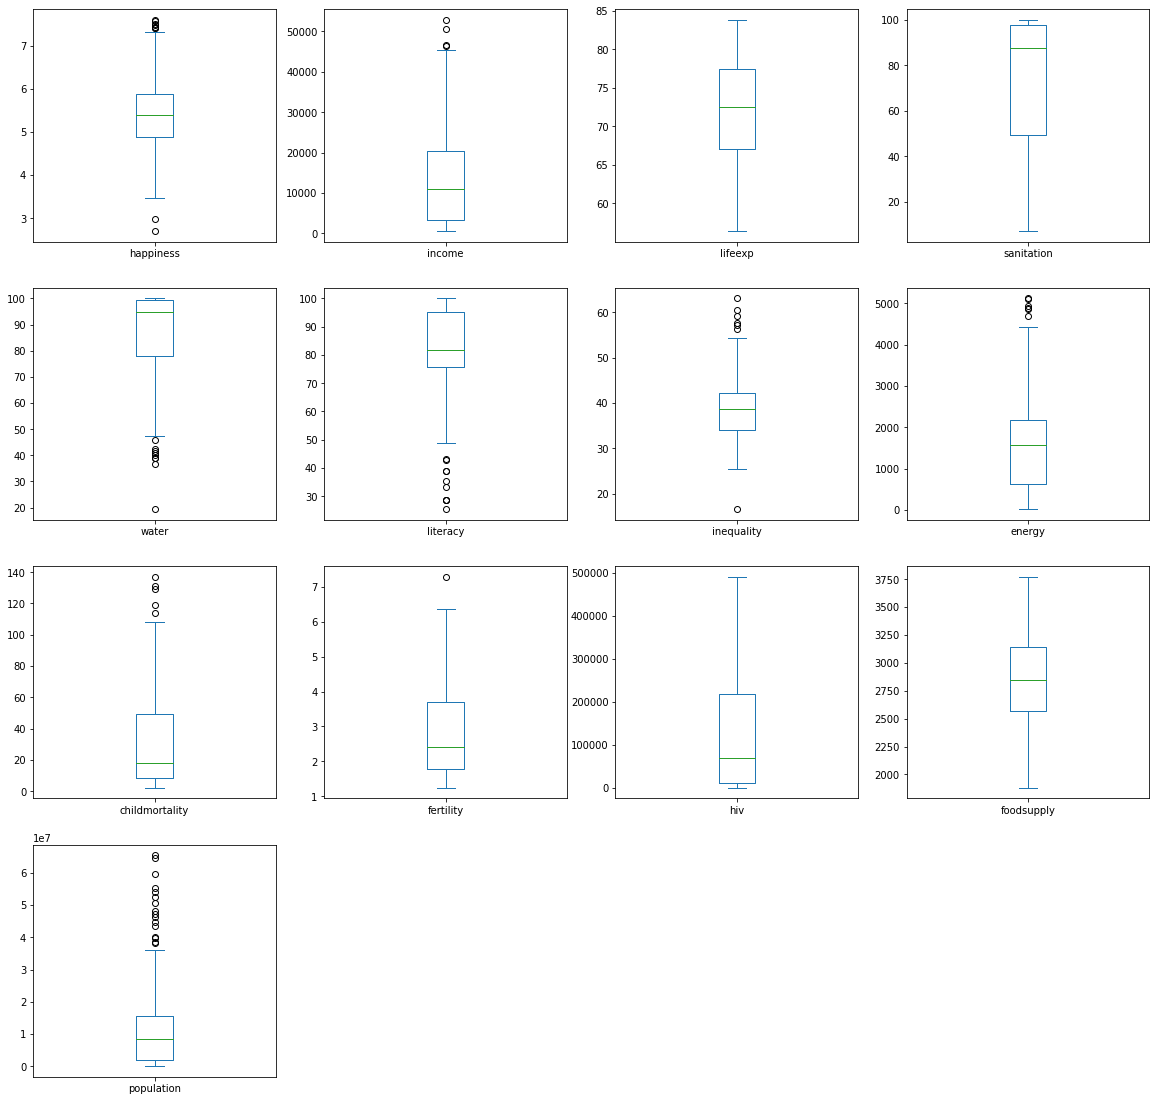

In [132]:
boxPlotAll(data)

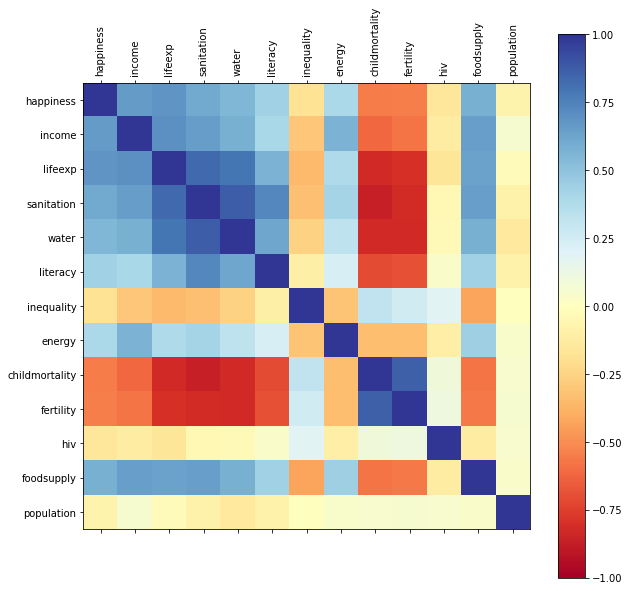

In [133]:
correlationMatrix(data)

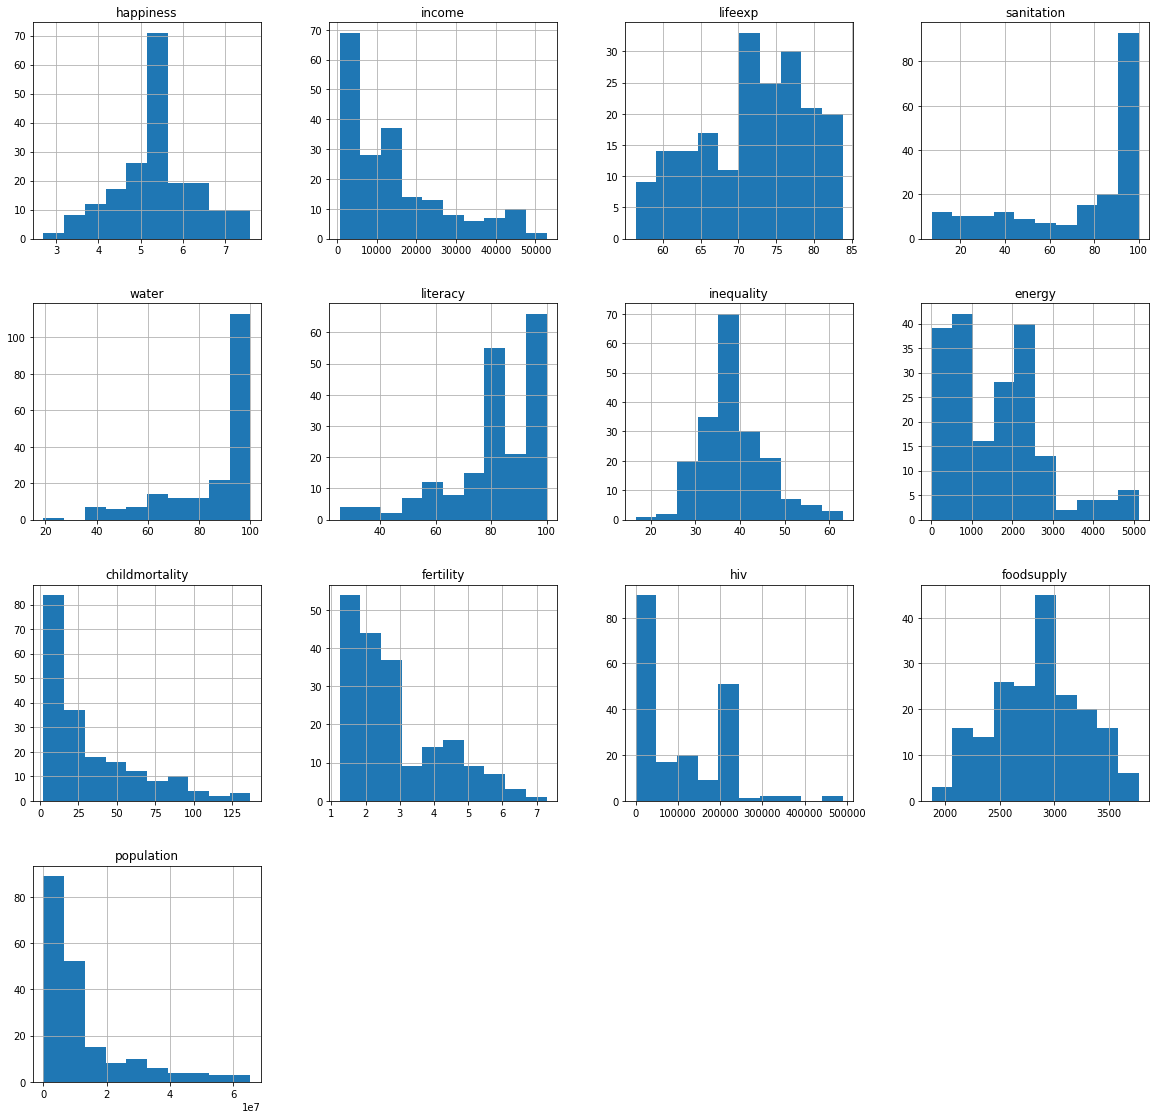

In [134]:
histPlotAll(data)

In [135]:
data.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population'],
      dtype='object')

## Prepare data for the model

## *Feature engineering technics*

In [138]:
binned=pd.cut(data['happiness'],bins=[0,4.5,6,10],labels=['L','M','H'])
data['happiness_band']=binned

In [139]:
data['happiness_band'].value_counts()

M    120
H     43
L     31
Name: happiness_band, dtype: int64

Split data into input and output set

In [140]:
y=data['happiness_band']
X=data[['income','lifeexp','sanitation','water','literacy','inequality','energy','childmortality','fertility','hiv','foodsupply','population']]

In [141]:
X.head()

,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,1750.0,57.9,39.2,63.0,39.000000,38.579375,2183.725325,73.2,4.80,5800.000000,2090.0,33700000.0
1,11000.0,77.6,97.7,91.4,96.800000,29.000000,808.000000,14.0,1.71,217991.677852,3190.0,2920000.0
2,19100.0,76.5,94.8,99.6,97.900000,41.400000,2020.000000,11.6,2.31,95000.000000,3230.0,43400000.0
3,8180.0,75.4,91.6,98.9,99.600000,32.400000,1020.000000,14.0,1.66,3600.000000,2930.0,2920000.0
4,43800.0,82.6,100.0,100.0,81.573826,34.700000,1575.970299,3.8,1.86,22000.000000,3280.0,23800000.0


In [142]:
y.head()

0    L
1    M
2    H
3    L
4    H
Name: happiness_band, dtype: category
Categories (3, object): ['L' < 'M' < 'H']

*Scale data*

In [143]:
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)

pd.DataFrame(rescaledX,columns=X.columns)

,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,0.021600,0.054745,0.345674,0.541512,0.183400,0.473693,0.425434,0.526706,0.588430,0.011716,0.111111,0.515209
1,0.198881,0.773723,0.975248,0.893432,0.957162,0.267241,0.156234,0.087537,0.077686,0.444813,0.693122,0.044488
2,0.354122,0.733577,0.944038,0.995043,0.971888,0.534483,0.393396,0.069733,0.176860,0.193779,0.714286,0.663552
3,0.144834,0.693431,0.909600,0.986369,0.994645,0.340517,0.197718,0.087537,0.069421,0.007225,0.555556,0.044488
4,0.827510,0.956204,1.000000,1.000000,0.753331,0.390086,0.306509,0.011869,0.102479,0.044781,0.740741,0.363807
...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.087529,0.507299,0.930047,0.998761,0.986613,0.450431,0.109075,0.108309,0.403306,0.444813,0.511086,0.001453
190,0.587941,0.609489,0.914981,0.961586,0.983936,0.510776,0.306509,0.125371,0.087603,0.026411,0.619048,0.020630
191,0.051689,0.575715,0.907447,0.991326,0.753331,0.484914,0.425434,0.178042,0.263789,0.444813,0.511086,0.000000
192,0.041915,0.262774,0.499570,0.882280,0.775100,0.452586,0.029238,0.192878,0.342149,0.444813,0.507937,0.003884


## ***Build model***

split the input data to train and test data set 

In [144]:
test_size=0.33
seed=1

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)

In [145]:
model_dt=DecisionTreeClassifier()
model_lr=LogisticRegression()

Fit model to the data

In [146]:
model_dt.fit(X_train,y_train)
model_lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

*check model*

In [147]:
predictions=model_dt.predict(X_train)
print(accuracy_score(y_train,predictions))

1.0


In [148]:
predictions=model_lr.predict(X_train)
print(accuracy_score(y_train,predictions))

0.6046511627906976


Evaluate model

In [149]:
predictions=model_dt.predict(X_test)
print(accuracy_score(y_test,predictions))

0.6461538461538462


In [150]:
predictions=model_lr.predict(X_test)
print(accuracy_score(y_test,predictions))

0.6


# Interprete decision tree model

In [155]:
#viewDecisionTree(model_dt,X.columns)

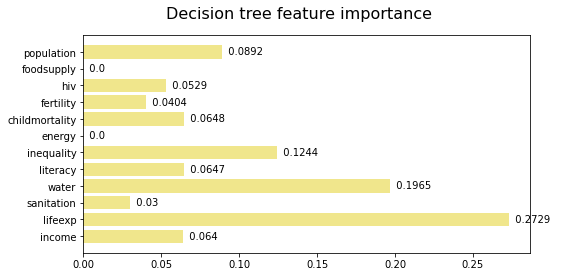

In [152]:
decisionTreeSummary(model_dt,X.columns)

Interprete Logistic regression

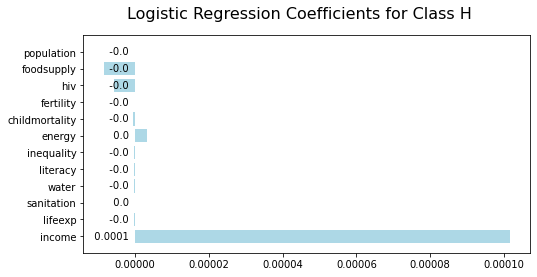

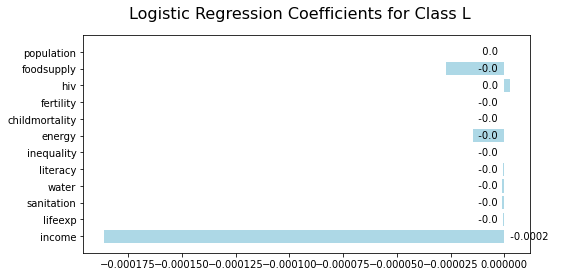

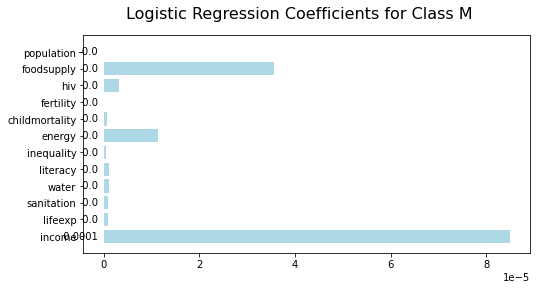

In [153]:
logisticRegressionSummary(model_lr,X.columns)